In [2]:
from chi import ssh

with ssh.Remote("129.114.27.80") as conn:
    conn.get("out.log")
    
with open("out.log") as f:
    data = []
    events = []
    for line in f.readlines():
        line = line.strip()
        if "event" in line:
            parts = line.split(",")
            events.append((parts[1], parts[3]))
        else:
            parts = line.split(",")
            time = parts[0].split(":")[2]
            data.append((time,parts[1], parts[2], parts[3]))

with open("out.csv", "w") as f:
    f.write("timestamp,current,voltage,power\n")
    for d in data:
        f.write(",".join(d) + "\n")


/opt/conda/lib/python3.10/site-packages/paramiko/client.py:835: UserWarning: Unknown ssh-ed25519 host key for 129.114.27.80: b'54ca8a24fe0478d5238acc5055ade0d7'
  warnings.warn(


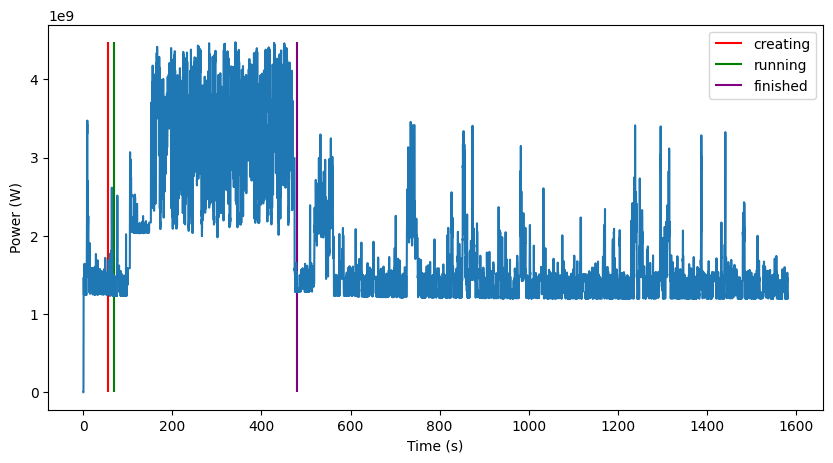

In [3]:
from collections import defaultdict

from IPython import display
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)


init_time = 0
times = []
powers = []
with open("out.csv") as f:
    i = 0
    for line in f.readlines()[1:]:
        parts = line.split(",")
        time = float(parts[0])
        if time - init_time < 0: 
            continue
        if times:
            times.append(time - init_time)
        else:
            init_time = time
            times.append(0)
        powers.append(float(parts[3]))
# Display a plot of the data
display.clear_output(wait=True)

for i, event in enumerate(events):
    plt.vlines(x = float(event[0])-init_time, ymin = min(powers), ymax = max(powers),
               colors = ["red", "green", "purple"][i],
               label = event[1])

plt.plot(times, powers)
plt.xlabel("Time (s)") 
plt.ylabel("Power (W)") 

plt.legend()

plt.show()